**Title:** Exploratory Data Analysis of Role Play World Community: Unveiling Patterns in Anonymous Online Interactions

**Author:** Heroshi Joe Abejuela

**Abstract:**

This study presents an exploratory data analysis (EDA) of the Role Play World (RPW) community, an anonymous online platform where users interact under various fictitious identities. The focus is on understanding user behavior, interaction patterns, and message characteristics by examining a dataset of transcribed interview responses from previous qualitative research.

**Research Limitations:**
- **Geographic and Cultural Bias:** The data is specific to the Philippines and may not reflect global RPW trends.

## **Import libraries**

In [1]:
!pip install chardet
!pip install pyLDAvis
!pip install plotly dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 39.2 MB/s eta 0:00:00


In [2]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import pyLDAvis
import pyLDAvis.lda_model
import seaborn as sns
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MultiLabelBinarizer
import dash
from dash import dcc, html, Input, Output
import plotly.express as px

## **Descriptive Statistics**

In [3]:
file_path = "/content/rpw_updated_data.csv"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
df = pd.read_csv(file_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InterviewSection,RespondentType,RespondentName,RPWUserSince,Question,Answer,YearsInRPW,Sentiment,Emotion
0,First Interview,FIRST RESPONDENT,CELESTE MAE ABAO,2019,1.What is RPW for you?,"For her, RPW is an escape from the real world....",4,0.200,Positive
1,First Interview,FIRST RESPONDENT,CELESTE MAE ABAO,2019,2.Why did you create an RPW account?,She made an account because she likes writing ...,4,-0.125,Neutral
2,First Interview,FIRST RESPONDENT,CELESTE MAE ABAO,2019,3.What do you do in RPW?,She is writer in RPW. She post stories and she...,4,0.500,Positive
3,First Interview,FIRST RESPONDENT,CELESTE MAE ABAO,2019,4.What benefits do you get when you use your R...,"Whenever she have problems in life, she have s...",4,-0.250,Negative
4,First Interview,FIRST RESPONDENT,CELESTE MAE ABAO,2019,5.What personality do you posses in RPW and in...,"In RPW, she is jolly and friendly. However, in...",4,0.130,Neutral


In [6]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
InterviewSection,0
RespondentType,0
RespondentName,0
RPWUserSince,0
Question,0
Answer,0
YearsInRPW,0
Sentiment,0
Emotion,0


In [7]:
df['InterviewSection'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
InterviewSection,
First Interview,84
Second Interview,24


In [8]:
df['RPWUserSince'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
RPWUserSince,
2019,69
2018,23
2017,16


In [9]:
df['RespondentName'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
RespondentName,
EMMAN REY VICENTE,25
REY RICH TAMAYO,23
TWINNY MAY ECHEVERIA,23
CELESTE MAE ABAO,21
MEA MARIE OGA,16


In [10]:
df['RespondentName'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['CELESTE MAE ABAO', 'REY RICH TAMAYO', 'TWINNY MAY ECHEVERIA',
       'MEA MARIE OGA', 'EMMAN REY VICENTE'], dtype=object)

In [11]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InterviewSection  108 non-null    object 
 1   RespondentType    108 non-null    object 
 2   RespondentName    108 non-null    object 
 3   RPWUserSince      108 non-null    int64  
 4   Question          108 non-null    object 
 5   Answer            108 non-null    object 
 6   YearsInRPW        108 non-null    int64  
 7   Sentiment         108 non-null    float64
 8   Emotion           108 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 7.7+ KB


**Interpretations:**

- **Data Type:** Pandas DataFrame
- **Size:** 108 rows, 9 columns
- **Data Types:**
    - 1 float64 column (likely sentiment scores)
    - 2 int64 columns (likely years or counts)
    - 6 object columns (text data like names, questions, answers)
- **Missing Data:** No missing values in any column
- **Memory Usage:** Approximately 7.7 KB


In [12]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,RPWUserSince,YearsInRPW,Sentiment
count,108.000000,108.000000,108.000000
mean,2018.490741,4.509259,0.133780
std,0.742506,0.742506,0.190310
min,2017.000000,4.000000,-0.250000
25%,2018.000000,4.000000,0.000000
50%,2019.000000,4.000000,0.116667
75%,2019.000000,5.000000,0.221528
max,2019.000000,6.000000,0.800000


## **Exploratory Data Analysis**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


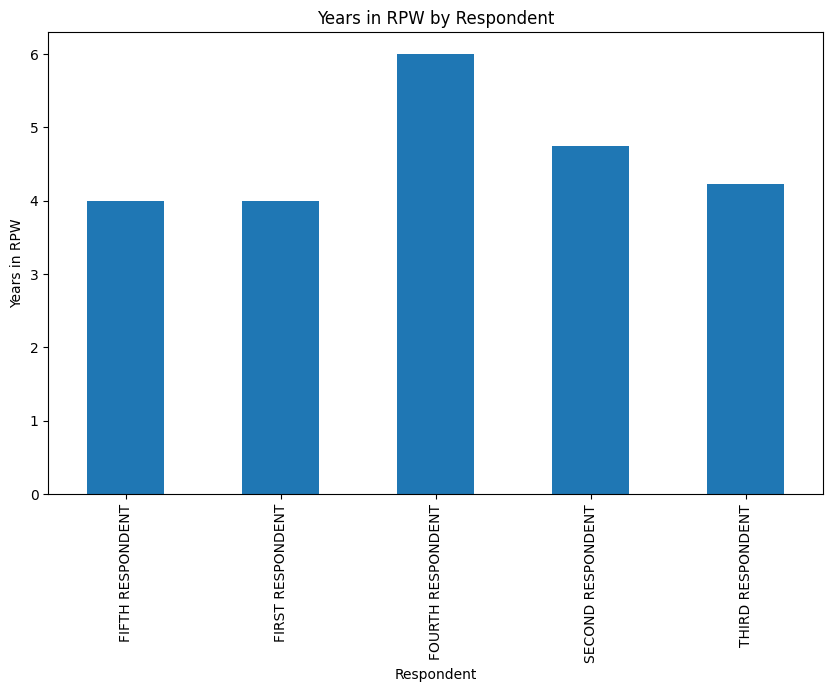

In [13]:
#Years in RPW (Bar Plot)
df['YearsInRPW'] = 2023 - df['RPWUserSince']  # The interview happened in the year 2023
average_years = df.groupby('RespondentType')['YearsInRPW'].mean()
plt.figure(figsize=(10, 6))
average_years.plot(kind='bar')
plt.title('Years in RPW by Respondent')
plt.xlabel('Respondent')
plt.ylabel('Years in RPW')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


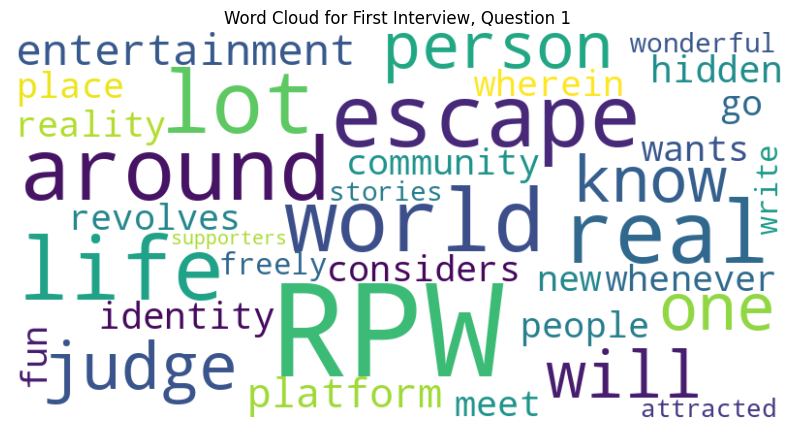

In [14]:
#Word Clouds for Answers (Example for First Interview, Question 1)
first_interview_q1 = df[(df['InterviewSection'] == 'First Interview') & (df['Question'] == '1.What is RPW for you?')]
text = ' '.join(first_interview_q1['Answer'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for First Interview, Question 1')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


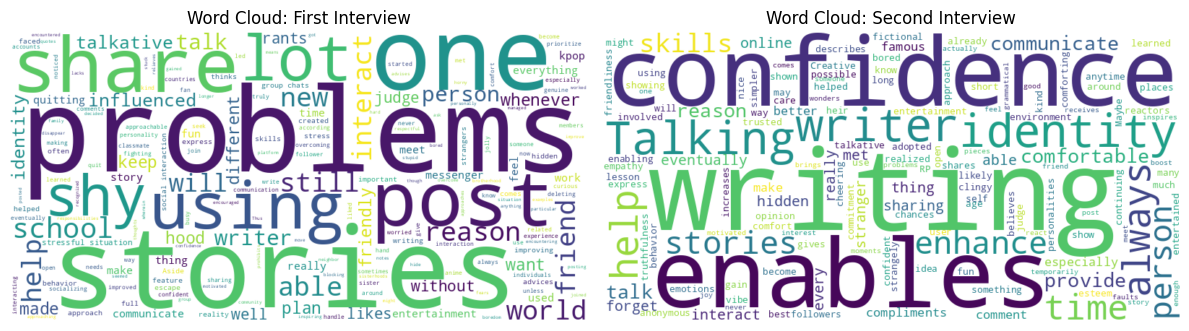

In [15]:
#Plot wordclouds for each interview session
# Create custom stop words
stopwords = set(STOPWORDS)
stopwords.update(["RPW", "users", "account", "real", "life", "friends", "people","first"])  # Add additional words

# First Interview
first_interview_text = ' '.join(df[df['InterviewSection'] == 'First Interview']['Answer'])
wordcloud_first = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(first_interview_text)

# Second Interview
second_interview_text = ' '.join(df[df['InterviewSection'] == 'Second Interview']['Answer'])
wordcloud_second = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(second_interview_text)

# Plot Word Clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_first, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud: First Interview')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_second, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud: Second Interview')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


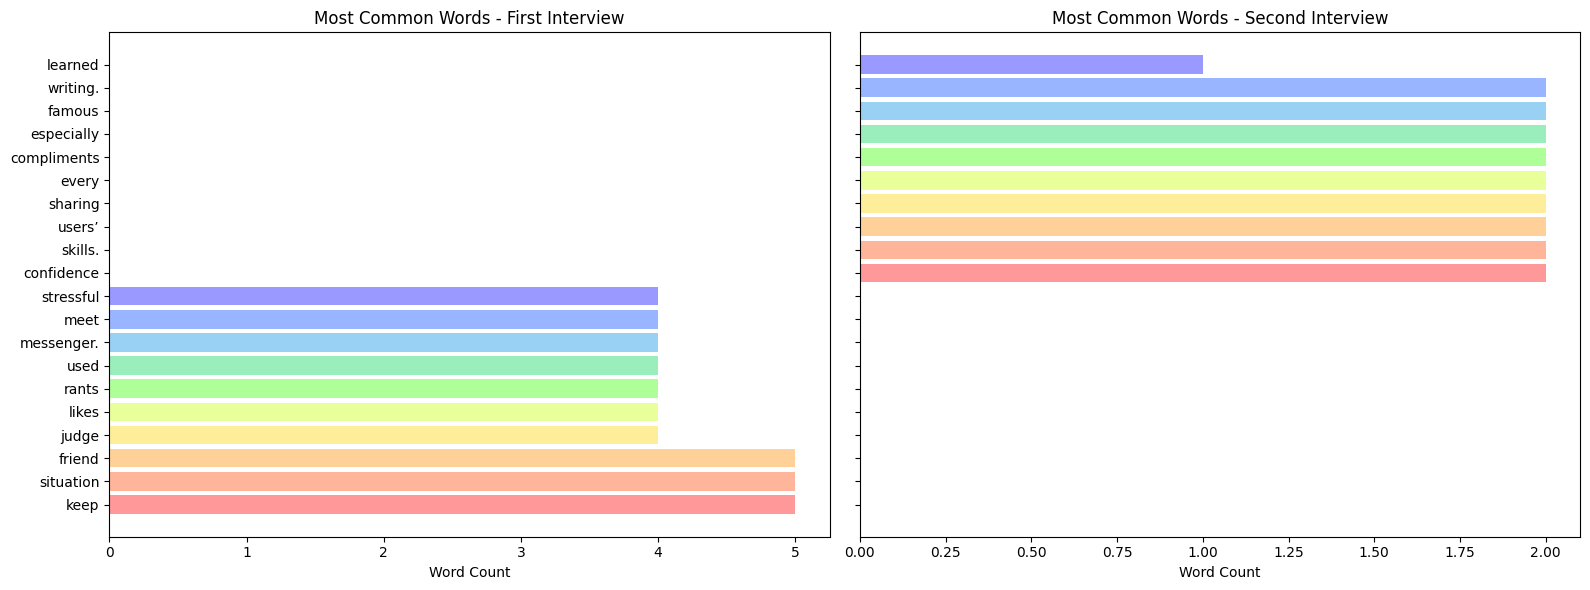

In [16]:
#Create custom stop words

stopwords = set(STOPWORDS)
stopwords.update(["RPW", "users", "account", "real", "life", "friends", "people", "said", "one", "rpw", "them.", "users'",
                 "rpw.", "rpw,", "however,", "life.", "made", "will", "still", "able", "new", "lot", "shy", "share",
                 "using", "talk", "whenever", "world.", "reason", "school", "influenced", "post", "help", "stories",
                 "problems", "really", "hidden", "met", "interact", "eventually", "communicate", "provide", "writing",
                 "enhance", "person", "always", "identity", "enables", "met", "interact", "able", "eventually",
                 "talk", "communicate", "provide", "writing", "enhance", "person", "help", "always", "talking",
                 "identity", "enables", "met", "interact", "able", "eventually", "talk", "communicate", "provide",
                 "writing", "enhance", "person", "help", "always", "talking", "identity", "enables","that,","friends.","first.","first","users'","account?","lesson"
                 ,"her,","without","account.","life,","users'"])
# Function to create a gradient colormap
def create_colormap(colors, positions):
    return LinearSegmentedColormap.from_list("my_cmap", list(zip(positions, colors)))

# Create colormap with a rainbow gradient
cmap = create_colormap(["#ff9999", "#ffcc99", "#ffff99", "#99ff99", "#99ccff", "#9999ff"], [0, 0.2, 0.4, 0.6, 0.8, 1])

# 1st Interview
first_interview_text = ' '.join(df[df['InterviewSection'] == 'First Interview']['Answer']).lower()
first_interview_words = [word for word in first_interview_text.split() if word not in stopwords]
word_counts_first = Counter(first_interview_words)
top_words_first = word_counts_first.most_common(10)  # Top 10 words

# 2nd Interview
second_interview_text = ' '.join(df[df['InterviewSection'] == 'Second Interview']['Answer']).lower()
second_interview_words = [word for word in second_interview_text.split() if word not in stopwords]
word_counts_second = Counter(second_interview_words)
top_words_second = word_counts_second.most_common(10)  # Top 10 words

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for 1st Interview
axes[0].barh([word[0] for word in top_words_first], [word[1] for word in top_words_first], color=cmap(np.linspace(0, 1, len(top_words_first))))
axes[0].set_title("Most Common Words - First Interview")
axes[0].set_xlabel("Word Count")

# Plot for 2nd Interview
axes[1].barh([word[0] for word in top_words_second], [word[1] for word in top_words_second], color=cmap(np.linspace(0, 1, len(top_words_second))))
axes[1].set_title("Most Common Words - Second Interview")
axes[1].set_xlabel("Word Count")

# Apply tight layout
plt.tight_layout()
plt.show()

In [17]:
#Correlation analysis years in rpw vs sentiment
print("\nCorrelation:")
print(df[['YearsInRPW', 'Sentiment']].corr())


Correlation:
            YearsInRPW  Sentiment
YearsInRPW    1.000000  -0.028415
Sentiment    -0.028415   1.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


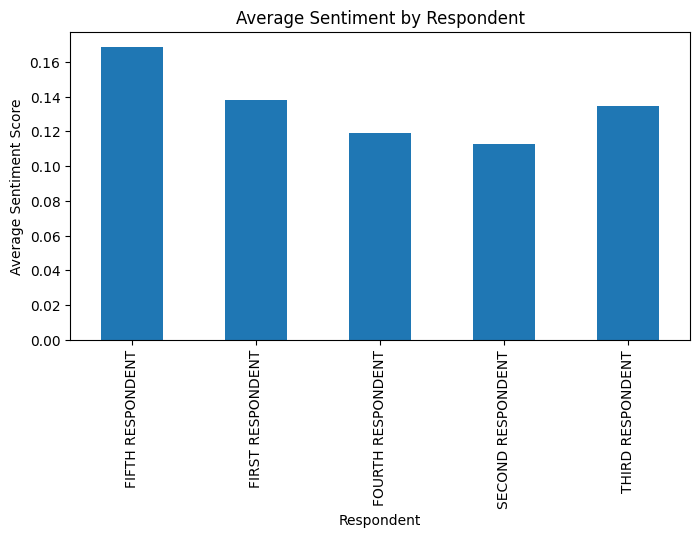

In [18]:
#Sentiment Analysis by Respondent Type
sentiment_by_type = df.groupby('RespondentType')['Sentiment'].mean()
plt.figure(figsize=(8, 4))
sentiment_by_type.plot(kind='bar')
plt.title('Average Sentiment by Respondent')
plt.xlabel('Respondent')
plt.ylabel('Average Sentiment Score')
plt.show()

In [19]:
sentiment_by_type

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sentiment
RespondentType,
FIFTH RESPONDENT,0.168824
FIRST RESPONDENT,0.137844
FOURTH RESPONDENT,0.119095
SECOND RESPONDENT,0.112656
THIRD RESPONDENT,0.134649


**Interpretations:**

   - **FIFTH RESPONDENT (0.1688)**: This group has the highest average sentiment score, suggesting that this respondent type generally reports the most positive feelings or experiences.
   - **FIRST RESPONDENT (0.1378)**: This group has the second-highest sentiment score, indicating positive feelings, but not as strong as the `FIFTH RESPONDENT`.
   - **THIRD RESPONDENT (0.1346)**: This group shows slightly less positive sentiment compared to the first two groups.
   - **FOURTH RESPONDENT (0.1191)**: This group has a lower average sentiment score, indicating somewhat less positive sentiment.
   - **SECOND RESPONDENT (0.1127)**: This group has the lowest average sentiment score, suggesting the least positive feelings or experiences among the respondent types.

**Summary**:
- The sentiment scores suggest variations in positivity among different respondent types, with some groups feeling more positive on average than others.
- The differences are relatively small, but still present, indicating that sentiment varies by respondent type. Further investigation into why these variations exist can provide deeper insights.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-20-efec6cd59002>:21: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


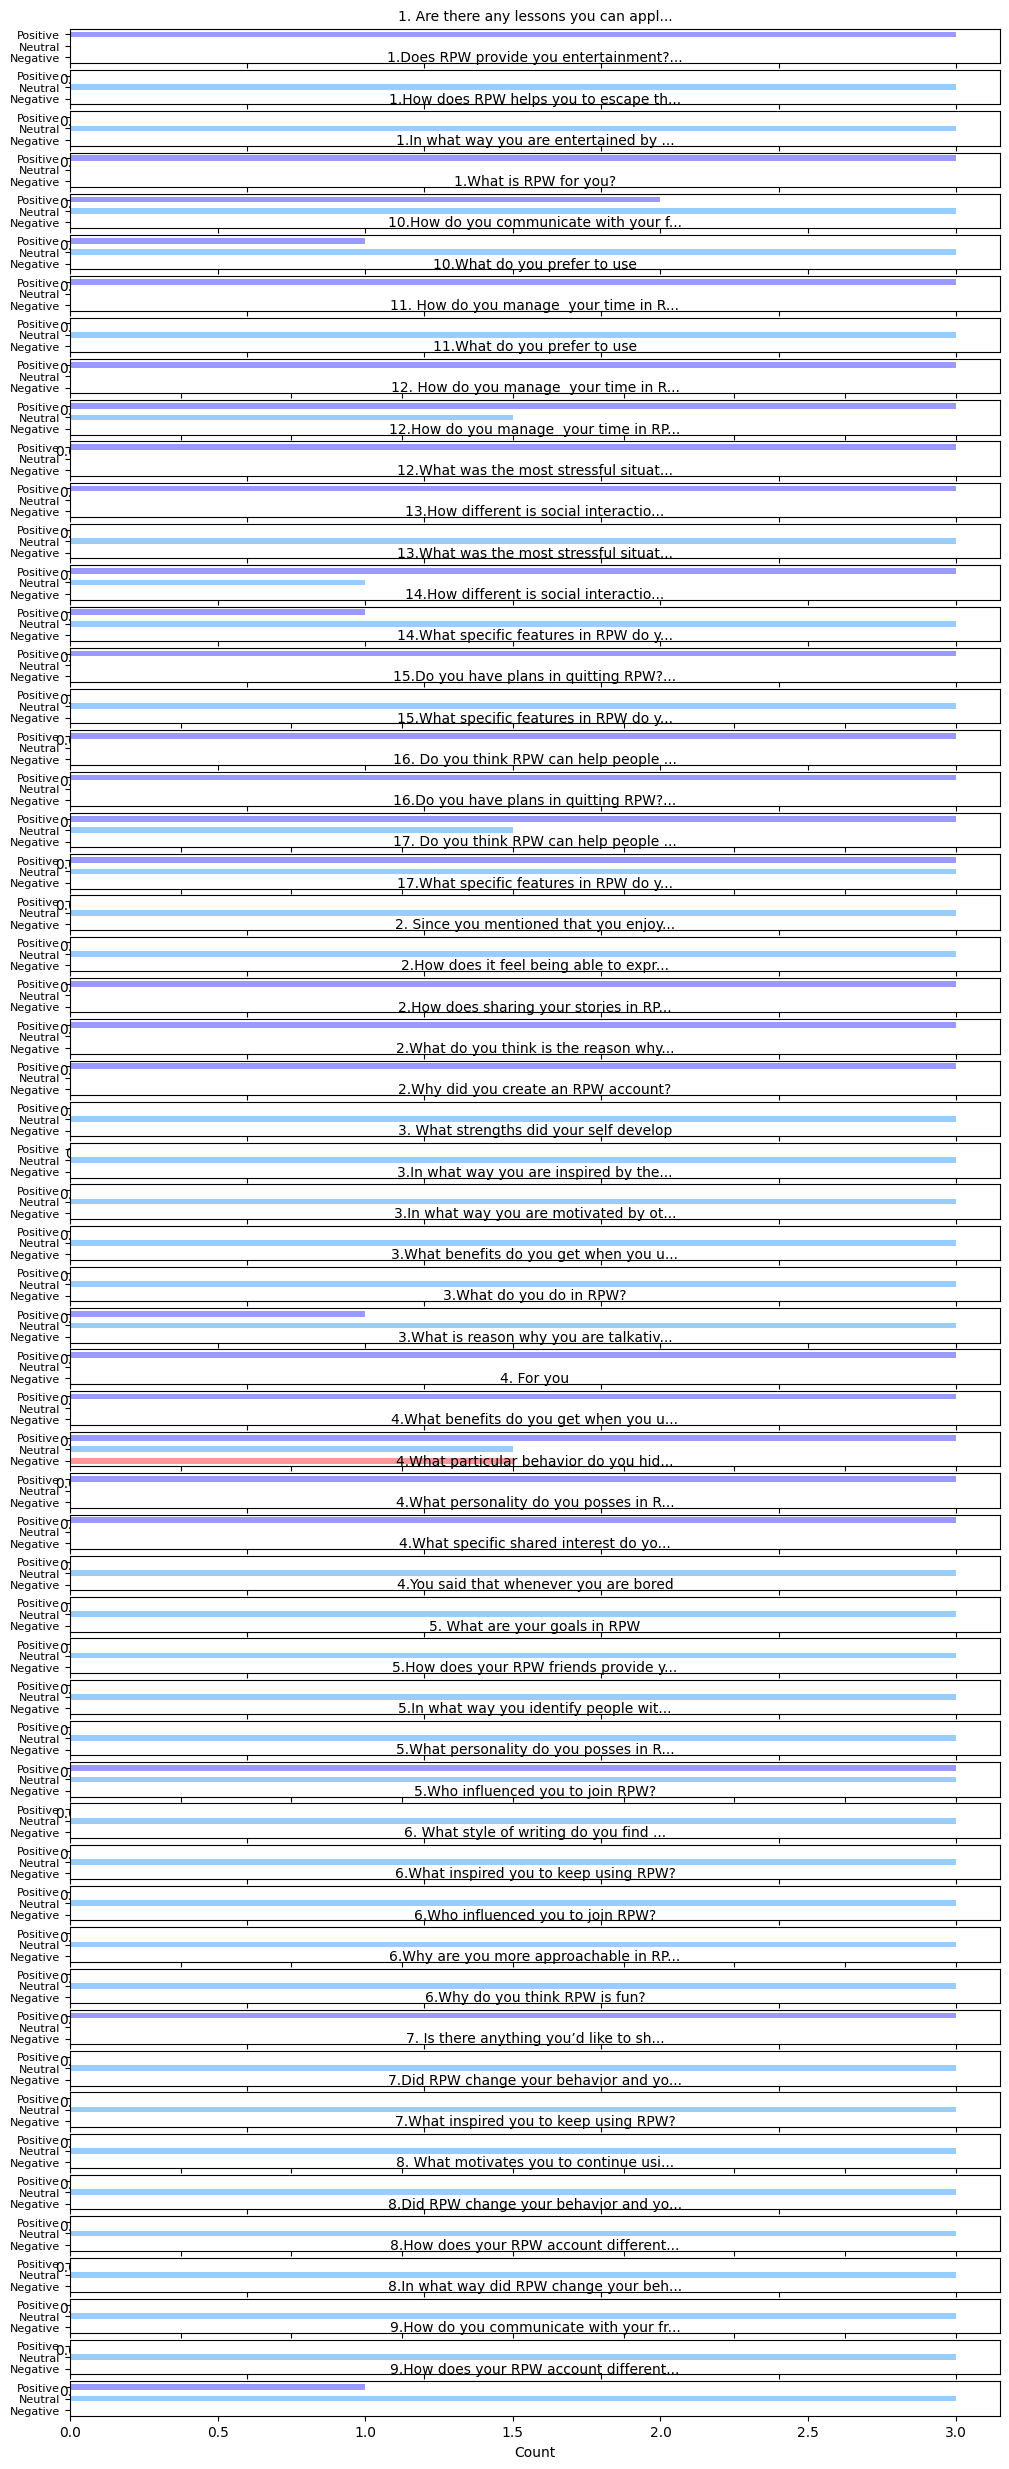

In [20]:
#Sentiment Analysis by Question (Using barh plot)

# Prepare the data
emotions_by_question = df.groupby('Question')['Emotion'].value_counts().unstack().fillna(0)

# Create the plot
plt.figure(figsize=(12, len(emotions_by_question.index) * 0.5 + 2))  # Adjust height dynamically
for i, question in enumerate(emotions_by_question.index):
    plt.subplot(len(emotions_by_question.index), 1, i + 1)
    emotions_by_question.loc[question].plot(kind='barh', color=['#ff9999', '#99ccff', '#9999ff'])

    # Wrap or truncate question titles
    title = question if len(question) <= 40 else question[:37] + '...'  # Truncate long titles
    plt.title(title, fontsize=10)  # Adjust fontsize if necessary
    plt.ylabel("")
    plt.xlabel("Count")

    # Optionally, adjust y-tick labels to improve readability
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

In [21]:
emotions_by_question

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Emotion,Negative,Neutral,Positive
Question,,,
1. Are there any lessons you can apply to yourself and you can share with others as you continue using RPW?,0.0,0.0,1.0
1.Does RPW provide you entertainment? In what way?,0.0,1.0,0.0
1.How does RPW helps you to escape the real world?,0.0,1.0,0.0
1.In what way you are entertained by RPW?,0.0,0.0,1.0
1.What is RPW for you?,0.0,3.0,2.0
10.How do you communicate with your friends in RPW?,0.0,3.0,1.0
10.What do you prefer to use,0.0,0.0,1.0
11. How do you manage your time in RPW and in school?,0.0,1.0,0.0
11.What do you prefer to use,0.0,0.0,4.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


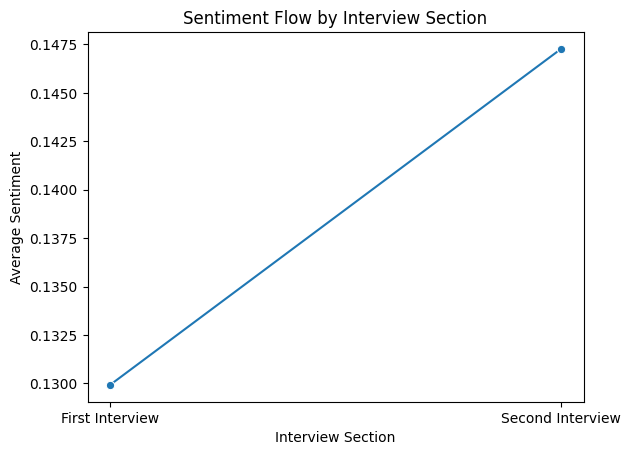

In [22]:
#Grouping by InterviewSection and calculating average sentiment
section_sentiment = df.groupby('InterviewSection')['Sentiment'].mean().reset_index()

# Plotting sentiment flow
sns.lineplot(data=section_sentiment, x='InterviewSection', y='Sentiment', marker='o')
plt.title('Sentiment Flow by Interview Section')
plt.xlabel('Interview Section')
plt.ylabel('Average Sentiment')
plt.show()

In [23]:
#Get average sentiment scores
first_interview_sentiment = df[df['InterviewSection'] == 'First Interview']['Sentiment'].mean()
second_interview_sentiment = df[df['InterviewSection'] == 'Second Interview']['Sentiment'].mean()

#Calculate the difference
sentiment_difference = second_interview_sentiment - first_interview_sentiment

#Calculate the percentage improvement
percentage_improvement = (sentiment_difference / first_interview_sentiment) * 100

#Print the result
print(f"Percentage Improvement in Sentiment: {percentage_improvement:.2f}%")

Percentage Improvement in Sentiment: 13.35%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Interpretations:**

* **Increased Familiarity:**  Respondents might have felt more comfortable and open during the second interview, leading to more positive sentiment. They might have been more relaxed and willing to share their thoughts after having a first interview.
* **Reflective Responses:**  The second interview might have prompted more reflection on their experiences with RPW. This reflection could have led to a more nuanced understanding and a more positive outlook.
* **Specific Questions:**  The questions in the second interview might have been more focused on positive aspects of RPW.
* **Respondent Selection:**  If the second interview was conducted with a slightly different sample of respondents, it's possible that the new respondents were more inclined to have a positive sentiment.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


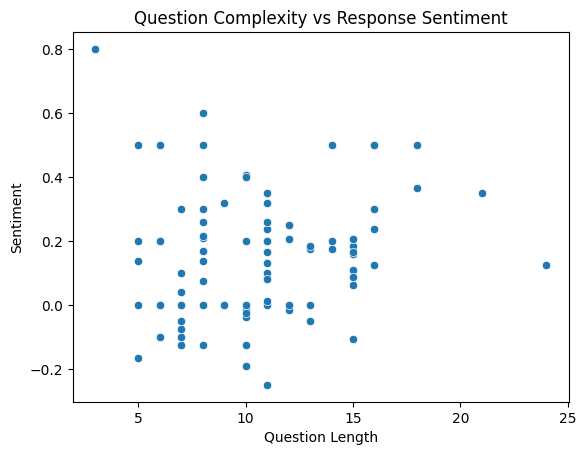

In [24]:
#Scatter plot for question len vs sentiment

# Calculate question length as a measure of complexity
df['QuestionLength'] = df['Question'].apply(lambda x: len(x.split()))

# Sentiment analysis using TextBlob
df['AnswerSentiment'] = df['Answer'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plotting question complexity vs sentiment
sns.scatterplot(data=df, x='QuestionLength', y='AnswerSentiment')
plt.title('Question Complexity vs Response Sentiment')
plt.xlabel('Question Length')
plt.ylabel('Sentiment')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


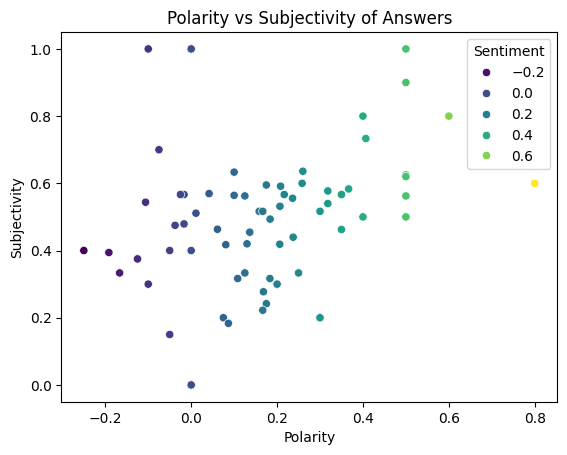

In [25]:
#Scatter plot for polarity vs answers (sentiment)

# Applying TextBlob to analyze polarity and subjectivity
df['AnswerPolarity'] = df['Answer'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['AnswerSubjectivity'] = df['Answer'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Plotting polarity vs subjectivity
sns.scatterplot(data=df, x='AnswerPolarity', y='AnswerSubjectivity', hue='Sentiment', palette='viridis')
plt.title('Polarity vs Subjectivity of Answers')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

**Understanding Polarity and Subjectivity:**

- **Polarity:**  This measures the overall sentiment of the text. It ranges from -1 (very negative) to +1 (very positive). A score of 0 indicates neutral sentiment.
- **Subjectivity:**  This measures how subjective or opinionated the text is. It ranges from 0 (very objective) to 1 (very subjective). A score of 0.5 indicates that the text is equally objective and subjective.

**Interpreting the Scatter Plot:**

1. **Clusters and Patterns:**
   - **Positive Sentiment:** Look for points clustered in the upper right quadrant of the plot. These answers tend to have both high polarity (positive sentiment) and high subjectivity (opinionated).
   - **Negative Sentiment:** Points in the lower left quadrant likely represent answers with low polarity (negative sentiment) and high subjectivity.
   - **Neutral Sentiment:**  Points closer to the center (around the x=0, y=0.5 mark) might indicate more neutral sentiment.
   - **Objective Answers:** Points near the y-axis (low subjectivity) represent answers that are more factual or objective.

2. **Color Coding:**
   - The color coding based on `Sentiment` will help you validate if the clusters align with your assigned sentiment categories.

3. **Outliers:**
   - Observe any outliers that deviate significantly from the main clusters. These could be answers that have strong polarity but are relatively objective (or vice versa). Analyze these outliers to understand their context and why they differ.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



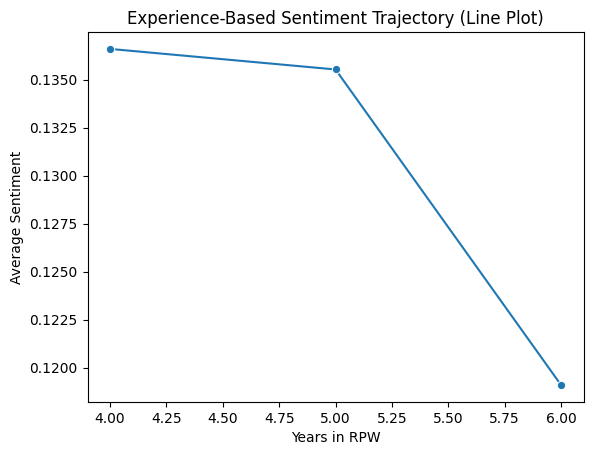

In [42]:
#Experience based sentiment trajectory

# Calculate average sentiment per experience year
experience_sentiment = df.groupby('YearsInRPW')['Sentiment'].mean().reset_index()

# Plotting sentiment trajectory
sns.lineplot(data=experience_sentiment, x='YearsInRPW', y='Sentiment', marker='o')
plt.title('Experience-Based Sentiment Trajectory (Line Plot)')
plt.xlabel('Years in RPW')
plt.ylabel('Average Sentiment')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



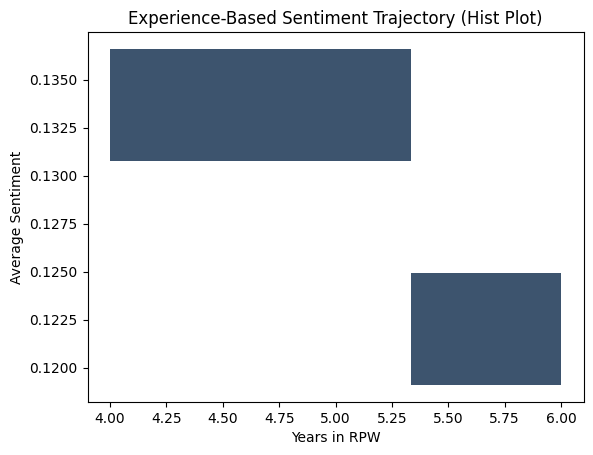

In [39]:
# Calculate average sentiment per experience year
experience_sentiment = df.groupby('YearsInRPW')['Sentiment'].mean().reset_index()

# Plotting sentiment trajectory
sns.histplot(data=experience_sentiment, x='YearsInRPW', y='Sentiment')
plt.title('Experience-Based Sentiment Trajectory (Hist Plot)')
plt.xlabel('Years in RPW')
plt.ylabel('Average Sentiment')
plt.show()

In [27]:
experience_sentiment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,YearsInRPW,Sentiment
0,4,0.136601
1,5,0.135531
2,6,0.119095


**Interpretations:**

- **Possible Negative Correlation:** This suggests that, based on these few data points, there might be a weak negative correlation between the years someone has been using RPW and their sentiment towards it.
- **User Fatigue:**  Respondents who have been using RPW for longer might be experiencing some fatigue or disillusionment.
- **Changing Features:**  RPW might have changed over time, and older users might be less satisfied with newer features or updates.
- **Initial Enthusiasm:**  New users might be more enthusiastic and have higher sentiment scores than long-time users.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


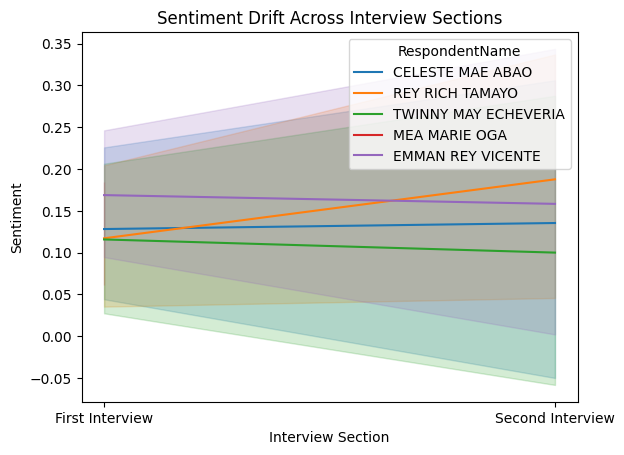

In [28]:
#Sentiment drift accross interview sections for each respondents

# Assuming the data is ordered by interview sections
sns.lineplot(data=df, x='InterviewSection', y='Sentiment', hue='RespondentName')
plt.title('Sentiment Drift Across Interview Sections')
plt.xlabel('Interview Section')
plt.ylabel('Sentiment')
plt.show()

In [29]:
# Calculate the average sentiment for each respondent during the first and second interviews
first_interview_avg = df[df['InterviewSection'] == 'First Interview'].groupby('RespondentName')['Sentiment'].mean().reset_index()
second_interview_avg = df[df['InterviewSection'] == 'Second Interview'].groupby('RespondentName')['Sentiment'].mean().reset_index()

# Merge the two averages on RespondentName
sentiment_comparison = pd.merge(first_interview_avg, second_interview_avg, on='RespondentName', suffixes=('_First', '_Second'))

# Calculate the improvement
sentiment_comparison['Improvement'] = sentiment_comparison['Sentiment_Second'] - sentiment_comparison['Sentiment_First']

# Filter respondents with significant positive improvement
significant_improvement = sentiment_comparison[sentiment_comparison['Improvement'] > 0]

# Display the result
print("Respondents with Significant Positive Improvement in Sentiment:")
print(significant_improvement[['RespondentName', 'Improvement']])

Respondents with Significant Positive Improvement in Sentiment:
     RespondentName  Improvement
0  CELESTE MAE ABAO     0.007215
2   REY RICH TAMAYO     0.070562


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Interpretations:**
- **Celeste Mae Abao** might have had a relatively stable emotional state across the interviews, with only a slight positive shift.
- **Rey Rich Tamayo** demonstrated a more significant positive shift, suggesting that their responses in the second interview were more positive compared to the first.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


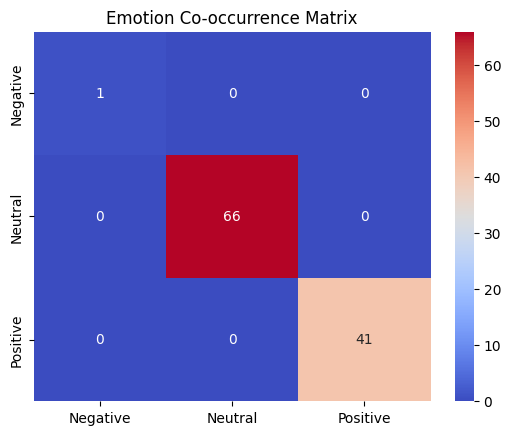

In [30]:
#Emotion matrix

# Assuming 'Emotion' column contains a list of emotions, or you can split the emotions in the string into a list
mlb = MultiLabelBinarizer()
emotion_encoded = mlb.fit_transform(df['Emotion'].str.split(','))  # Splitting by comma if it's a string
emotion_df = pd.DataFrame(emotion_encoded, columns=mlb.classes_, index=df.index)

# Create co-occurrence matrix
co_occurrence_matrix = emotion_df.T.dot(emotion_df)

# Plot heatmap
sns.heatmap(co_occurrence_matrix, annot=True, cmap='coolwarm')
plt.title('Emotion Co-occurrence Matrix')
plt.show()

## **Interactive Plots**

In [31]:
#Latent Dirichlet Allocation (LDA)

# Combine 'Question' and 'Answer' into one text feature
combined_text = df['Question'] + ' ' + df['Answer']

# Vectorize text data
vectorizer = CountVectorizer(stop_words='english')
text_vectorized = vectorizer.fit_transform(combined_text)

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(text_vectorized)

# Visualize the topics using the updated method
panel = pyLDAvis.lda_model.prepare(lda, text_vectorized, vectorizer, mds='tsne') # Use lda_model instead of sklearn
pyLDAvis.display(panel)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Allocation (LDA) model visualized with pyLDAvis**

**1. Intertopic Distance Map:**

Circles: Each circle represents a topic. The size of the circle indicates the prevalence of the topic within the corpus.
Distance: The distance between circles represents the similarity between topics. Closer circles indicate more similar topics.

**2. Relevance Metric (Lambda):**

Slider: Adjust the lambda slider to balance between term frequency within a topic (lambda = 0) and term exclusivity to a topic (lambda = 1).
Interpretation: A higher lambda emphasizes terms that are unique to a topic, while a lower lambda shows more common terms within a topic.

**3. Topic Word List:**

Top Words: For each selected topic, the right panel displays the most relevant terms. The red bars show the frequency of each term in the selected topic, while the blue bars show the overall frequency of the term in the corpus.

**4. Understanding Topics:**

Explore: Select different topics on the map and adjust the lambda slider to understand the key themes and terms associated with each topic.
Interpretation: Interpret the topics based on the combination of relevant terms. For example, a topic with terms like "platform," "connect," and "friends" might be interpreted as a topic about social interaction.

**5. Applying Insights:**

**Document Classification**: You can use the LDA model to classify new documents into the identified topics.

**Feature Engineering:** The topic distributions for each document can be used as additional features in other machine learning models.

**Content Analysis**: LDA can help you uncover hidden patterns and themes within your text data.

LDA is a probabilistic model, so the interpretation of topics is subjective and requires domain knowledge.

In [32]:
# Create the Plotly bar chart for emotions
emotion_counts = df['Emotion'].value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

emotion_bar = px.bar(
    emotion_counts,
    x='Emotion',
    y='Count',
    color='Emotion',
    labels={'Count': 'Number of Responses', 'Emotion': 'Sentiment'},
    title='Sentiment Distribution by Emotion'
)

# Create the Dash application
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Interactive Sentiment Analysis"),

    dcc.Graph(
        id='emotion-bar-chart',
        figure=emotion_bar
    ),

    dcc.Graph(
        id='question-detail-chart'
    )
])

@app.callback(
    Output('question-detail-chart', 'figure'),
    Input('emotion-bar-chart', 'clickData')
)
def update_question_chart(clickData):
    if clickData is None:
        return px.bar(title="Select an Emotion to See Related Questions")

    selected_emotion = clickData['points'][0]['x']
    filtered_df = df[df['Emotion'] == selected_emotion]

    question_chart = px.bar(
        filtered_df,
        y='Question',
        x='Sentiment',
        color='Emotion',
        text='Sentiment',
        orientation='h',
        labels={'Sentiment': 'Sentiment Score', 'Question': 'Survey Question'},
        title=f'Questions Related to Emotion: {selected_emotion}'
    )

    question_chart.update_layout(
        xaxis_title='Sentiment Score',
        yaxis_title='',
        yaxis=dict(
            tickvals=[],
            ticktext=[],
            showticklabels=False  # Hide y-axis labels to avoid crowding
        ),
        margin=dict(l=100, r=20, t=50, b=20)  # Adjust margins as needed
    )

    return question_chart

if __name__ == '__main__':
    app.run_server(debug=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

**Interactive Sentiment Analysis Dashboard**

1. **Data Visualization:** The code first creates a bar chart that shows the distribution of different emotions expressed in the survey data.
2. **Interactive Exploration:** When a user clicks on a bar in the initial chart (representing an emotion), the dashboard dynamically updates to show a second chart.
3. **Related Questions:** This second chart displays the survey questions associated with the selected emotion, along with their sentiment scores.
4. **Dash Framework:** The code uses the Dash framework, a Python library for building web applications, to create the interactive dashboard.
5. **Plotly for Visualization:** Plotly is used for creating the charts, allowing for interactive exploration.
6. **Pandas for Data Manipulation:** Pandas is used to process and manipulate the survey data, including filtering and preparing data for the charts.

## **Conclusion and Recommendations for Further Research**

The analysis of the RPW (Role Play World) dataset provides valuable insights into the sentiments and experiences of users within the RPW community, a term used to describe users on social media platforms, most notably Facebook, who assume roles related to Korean idols, Japanese idols, anime characters, and more, in order to conceal their true identities. The RPW concept involves users adopting roles and engaging in role-playing activities that are distinct from their real-life personas, creating a unique and immersive environment.

1. **Impact of Anonymity on User Sentiment:**

   The sentiment analysis reveals that RPW users generally have a positive outlook on their experiences, with an average sentiment score of 0.134. This suggests that users, on average, view their interactions and role-playing activities positively. However, sentiment scores range from -0.250 to 0.800, indicating a broad spectrum of experiences from negative to very positive.

   The positive sentiment aligns with the qualitative findings that anonymity in RPW facilitates open communication and self-expression. Users are able to engage freely and express themselves without the constraints of offline identities, which supports the presence of the online disinhibition effect. This effect allows users to exhibit different behaviors and attitudes online compared to their real-life interactions.

2. **Sentiment Variations Across Respondent Types and Interview Sections:**

   Analysis of sentiment across different respondent types reveals that the FIFTH RESPONDENT group has the highest average sentiment score, while the SECOND RESPONDENT group has the lowest. Although the differences are relatively modest, they highlight varying levels of positivity among different user groups. This variation suggests diverse engagement patterns and experiences within the RPW community.

   Additionally, the sentiment analysis of interview sections shows that the second interview, with fewer responses, has a higher average sentiment compared to the first. This 13.35% increase in sentiment positivity might indicate that users, having had prior interaction with RPW, felt more comfortable and connected during the second interview. Given that RPW users are deeply immersed in their role-playing activities and often lose track of reality or time, the interview may have offered a rare opportunity for them to express emotions and feelings that are otherwise suppressed. The role-playing world provides an escape from real-life constraints, such as family limitations, and allows for interactions without boundaries. Thus, the increased positivity observed in the second interview may reflect a stronger connection to the RPW community and a deeper expression of their emotions and experiences.

3. **Correlation with Experience:**

   The weak negative correlation between years of experience using RPW and sentiment (-0.028) suggests that the duration of platform use does not significantly impact sentiment. This implies that the positive effects of anonymity on user sentiment are consistent regardless of how long users have been active on RPW. However, this correlation should be interpreted cautiously due to the small sample size.

4. **Broader Implications:**

   The findings confirm that RPW serves as more than just an entertainment platform; it is a space for personal expression and skill development. The positive sentiment reported by users underscores RPW's role as a valuable medium for communication, socialization, and writing, facilitated by the anonymity it offers. Users can transcend limitations and engage in meaningful interactions that contribute to personal growth.

#### **Recommendations for Further Research**

1. **Explore Factors Influencing Sentiment Variability:**
   - Conduct studies to identify specific factors influencing sentiment differences among various respondent groups. Analyze user engagement, interaction quality, and demographic variables to understand why certain groups experience RPW more positively than others.

2. **Longitudinal Studies:**
   - Implement longitudinal studies to track sentiment changes over time. This approach can provide insights into how user experiences evolve with prolonged RPW use and whether sentiment trends towards more positive or negative views.

3. **Examine the Impact of Anonymity in Different Contexts:**
   - Investigate the effects of anonymity on behavior and sentiment across other online communities or platforms. Comparing RPW with other anonymous or semi-anonymous platforms can offer a broader understanding of anonymity's impact on user interactions and experiences.

4. **Analyze User Feedback and Interaction Patterns:**
   - Perform detailed analyses of user feedback and interaction patterns within RPW. Examine communication content, interaction frequency, and user-generated content to gain deeper insights into how anonymity influences user behavior and sentiment.

5. **Survey a Broader Sample:**
   - Expand the sample size and diversity of respondents in future studies to enhance representativeness and generalizability. Including users from different geographical regions, age groups, and backgrounds could provide a more comprehensive view of user experiences and sentiments.

6. **Investigate the Role of Platform Features:**
   - Analyze how specific features of RPW (e.g., role-playing scenarios, chat functionalities) impact user sentiment and skill development. Understanding which features contribute most to positive or negative experiences can guide platform improvements and user engagement strategies.

7. **Explore Social Interaction Dynamics:**
   - Research the dynamics of social interaction within RPW to understand how anonymity influences social bonds and user engagement. Investigate whether increased social interaction correlates with higher sentiment positivity and if users' role-playing experiences contribute to their sense of community.

In conclusion, RPW is affirmed as a platform where anonymity fosters positive user experiences, allowing individuals to express themselves and develop skills in a secure and supportive environment. The increased sentiment positivity observed in the second interview highlights the importance of providing users with opportunities to express their emotions and connect with the RPW community. Future research should build on these findings to further explore the nuances of user sentiment and engagement, ultimately enhancing the understanding and development of anonymous online interactions.

## **References**

1. Teo, K., Oksanen, A., & Räsänen, P. (2015). Who prefers anonymous self-expression online? A survey-based study of Finns aged 15–30 years. *Information, Communication & Society, 18*(6), 717-732. https://doi.org/10.1080/1369118X.2014.991342

2. Arcelus, J., Bouman, W. P., & Van den Noortgate, W. (2017). Systematic review and meta-analysis of prevalence studies in transsexualism. *European Psychiatry, 45*, 103–115. https://doi.org/10.1016/j.eurpsy.2017.06.005

3. Mauri, M., Cipresso, P., Balgera, A., Villamira, M., & Riva, G. (2011). Why is Facebook so successful? Psychophysiological measures describe a core flow state while using Facebook. *Cyberpsychology, Behavior, and Social Networking, 14*(12), 723–731. https://doi.org/10.1089/cyber.2010.0377

4. Dzogbenuku, R. K., Doe, J. K., & Amoako, G. K. (2022). Social media information and student performance: The mediating role of hedonic value (entertainment). *Journal of Research in Innovative Teaching & Learning, 15*(1), 132-146.

5. Jarman, H. K., Marques, M. D., McLean, S. A., Slater, A., & Paxton, S. J. (2021). Motivations for social media use: Associations with social media engagement and body satisfaction and well-being among adolescents. *Journal of Youth and Adolescence, 50*, 2279–2293.

6. Liu, F., Deng, H., Zhang, Q., Fang, Q., Liu, B., Yang, D., Tian, X., & Wang, X. (2022). Symptoms of internet gaming disorder among male college students in Nanchong, China. *BMC Psychiatry, 22*, 142.

7. Donnelly, G. E., Ksendzova, M., Howell, R. T., Vohs, K. D., & Baumeister, R. F. (2016). Buying to blunt negative feelings: Materialistic escape from the self. *Review of General Psychology, 20*(3), 272–316.

8. Jouhki, H., Savolainen, I., Sirola, A., & Oksanen, A. (2022). Escapism and Excessive Online Behaviors: A Three-Wave Longitudinal Study in Finland during the COVID-19 Pandemic. *International Journal of Environmental Research and Public Health, 19*(19), 12491. https://doi.org/10.3390/ijerph191912491

9. Serrano-Puche, J. (2020). Affect and the expression of emotions on the internet: An overview of current research. In *Second International Handbook of Internet Research* (pp. 529-547).

10. Appel, H., & Gerlach, A. L. (2016). The social self-esteem inventory: Assessing online and offline self-esteem. *Computers in Human Behavior, 63*, 918-926.

11. Sousa, S., & Lamas, D. (2011). Emerging trust patterns in online communities. In F. Xia, Z. Chen, G. Pan, L. T. Yang, & J. Ma (Eds.), *Proceedings of the 4th IEEE International Conference on Cyber, Physical and Social Computing: CPSCom 2011* (pp. 313-317). IEEE Computer Society.

12. Suler, J. (2004). The online disinhibition effect. *Cyberpsychology & Behavior, 7*(3), 321-326.

13. Smith-Merry, J., Goggin, G., Campbell, A., McKenzie, K., Ridout, B., & Baylosis, C. (2019). Social connection and online engagement: Insights from interviews with users of a mental health online forum. *JMIR Mental Health, 6*(3), e11084.

14. Highton-Williamson, E., Priebe, S., & Giacco, D. (2015). Online social networking in people with psychosis: A systematic review. *International Journal of Social Psychiatry, 61*(1), 92-101.

15. Naslund, J. A., Aschbrenner, K. A., & Bartels, S. J. (2016). How people with serious mental illness use smartphones, mobile apps, and social media. *Psychiatric Rehabilitation Journal, 39*(4), 364.

16. Barak, A., Boniel-Nissim, M., & Suler, J. (2008). Fostering empowerment in online support groups. *Computers in Human Behavior, 24*(5), 1867-1883.

17. Thomas, N., Farhall, J., Foley, F., Leitan, N. D., Villagonzalo, K. A., Ladd, E., ... & Kyrios, M. (2016). Promoting personal recovery in people with persisting psychotic disorders: Development and pilot study of a novel digital intervention. *Frontiers in Psychiatry, 7*, 196.

18. Orth, U., Robins, R. W., & Widaman, K. F. (2012). Life-span development of self-esteem and its effects on important life outcomes. *Journal of Personality and Social Psychology, 102*(6), 1271–1288. https://doi.org/10.1037/a0025558

**Copyright © 2024 by Heroshi Joe Abejuela. All rights reserved. Unauthorized distribution or reproduction of this work is prohibited and may be subject to legal penalties.**